## 탐색적 데이터 분석(EDA)

In [1]:
# /kaggle/input/intel-image-classification

import os

IS_KAGGLE = False

if IS_KAGGLE:
    dataPath = '/kaggle/input/intel-image-classification'
else:
    dataPath = 'Intel_Image'

fileNames = os.listdir(dataPath)
fileNames

['seg_pred', 'seg_test', 'seg_train']

### Train 데이터셋의 폴더를 확인

seg_train/seg_train 폴더 안에 6개의 클래스가 각각 폴더로 나누어서 저장

In [2]:
trainPath = os.path.join(dataPath,'seg_train', 'seg_train')
labels = os.listdir(trainPath)
labels

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [3]:
for folder in os.listdir(trainPath):
    path = os.path.join(trainPath, folder)
    if os.path.isdir(path):
        print(f"{folder} : {len(os.listdir(path))}")

buildings : 2191
forest : 2271
glacier : 2404
mountain : 2512
sea : 2274
street : 2382


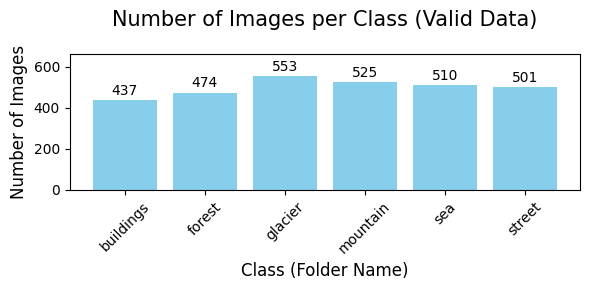

In [4]:
import os
import matplotlib.pyplot as plt

# 폴더 이름과 각 폴더의 이미지 개수를 저장할 리스트
folder_names = []
image_counts = []

validPath = os.path.join(dataPath,'seg_test','seg_test')

for folder_name in os.listdir(validPath):
    folder_path = os.path.join(validPath, folder_name)
    
    # 폴더인 경우에만 처리
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        folder_names.append(folder_name)
        image_counts.append(num_images)

# 막대 그래프 그리기
plt.figure(figsize=(6, 3)) # 그래프 크기 설정
plt.bar(folder_names, image_counts, color='skyblue')

# ✅ 수정된 부분 1: y축 공간을 넓혀주기 (가장 큰 막대 길이의 1.2배로 설정)
max_count = max(image_counts) if len(image_counts) > 0 else 0
plt.ylim(0, max_count * 1.2)

# ✅ 수정된 부분 2: title에 pad 설정으로 위아래 간격 벌리기
plt.title('Number of Images per Class (Valid Data)', fontsize=15, pad=20)
plt.xlabel('Class (Folder Name)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)

# x축 레이블 회전 (클래스 이름이 길 경우 겹치지 않게)
plt.xticks(rotation=45)

# 각 막대 위에 개수 텍스트 표시
for i, count in enumerate(image_counts):
    # 텍스트 위치도 값에 비례하여 약간 위로 떨어지게 설정
    plt.text(i, count + (max_count * 0.02), str(count), ha='center', va='bottom')

plt.tight_layout() # 레이아웃 조정
plt.show()

In [5]:
# HOME/Intel_Image/seg_pred/seg_pred
import os

# 예측(pred) 데이터의 경로 설정 (dataPath가 'Intel_Image'로 설정되어 있다고 가정)
predPath = os.path.join(dataPath, 'seg_pred', 'seg_pred')

# 해당 경로가 존재하는지 확인 후 파일 갯수 계산
if os.path.exists(predPath):
    # 폴더 내의 모든 파일 목록을 가져옴
    file_list = os.listdir(predPath)
    
    # 디렉토리를 제외하고 순수 파일(이미지)만의 갯수를 구함
    # (선택 사항지만 안전하게 파일만 세는 것이 좋습니다)
    num_files = len([file for file in file_list if os.path.isfile(os.path.join(predPath, file))])
    
    print(f"seg_pred 폴더에 있는 총 파일(이미지) 갯수: {num_files}개")
else:
    print(f"에러: 해당 경로를 찾을 수 없습니다. 경로가 올바른지 확인해주세요. ({predPath})")

seg_pred 폴더에 있는 총 파일(이미지) 갯수: 7301개


In [6]:
# trainPath에서 이미지 한장을 랜덤으로 선택해서 이미지의 픽셀값을 numpy 배열로 출력하는 코드

import os
import random
import numpy as np
from PIL import Image

# 1. trainPath 내의 모든 폴더(클래스) 목록 가져오기
class_folders = [f for f in os.listdir(trainPath) if os.path.isdir(os.path.join(trainPath, f))]

if not class_folders:
    print("에러: trainPath에 클래스 폴더가 없습니다.")
else:
    # 2. 랜덤하게 폴더 하나 선택
    random_folder = random.choice(class_folders)
    folder_path = os.path.join(trainPath, random_folder)
    
    # 3. 해당 폴더 내의 모든 이미지 파일 목록 가져오기 (확장자 필터링)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if not image_files:
        print(f"에러: {random_folder} 폴더에 이미지가 없습니다.")
    else:
        # 4. 랜덤하게 이미지 파일 하나 선택
        random_image = random.choice(image_files)
        image_path = os.path.join(folder_path, random_image)
        
        print(f"선택된 클래스: {random_folder}")
        print(f"선택된 이미지 파일: {random_image}")
        print("-" * 30)
        
        # 5. 이미지를 열고 NumPy 배열로 변환
        img = Image.open(image_path)
        img_array = np.array(img)
        
        # 6. 배열의 형태(shape)와 데이터 출력
        # 보통 컬러 이미지는 (높이, 너비, 채널 수(3)) 형태를 가집니다.
        print(f"이미지 형태 (Shape): {img_array.shape}")
        print("\n--- 픽셀 값 (NumPy 배열) ---")
        print(img_array)


선택된 클래스: buildings
선택된 이미지 파일: 17480.jpg
------------------------------
이미지 형태 (Shape): (150, 150, 3)

--- 픽셀 값 (NumPy 배열) ---
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[112  52  41]
  [107  48  34]
  [137  74  59]
  ...
  [253 226 207]
  [250 234 211]
  [212 200 176]]

 [[ 94  34  23]
  [ 93  34  20]
  [129  66  51]
  ...
  [252 225 206]
  [246 230 207]
  [225 213 189]]

 [[108  48  37]
  [106  47  33]
  [144  81  66]
  ...
  [252 225 206]
  [244 228 205]
  [231 219 195]]]


In [7]:
# 원본 모든 이미지가 150x150으로 되어 있는가를 확인, trainPath의 모든 이미지 사이즈를 확인

from PIL import Image
from collections import Counter
import os

# trainPath 내의 모든 이미지 사이즈 확인
image_sizes = []

for folder_name in os.listdir(trainPath):
    folder_path = os.path.join(trainPath, folder_name)
    
    # 폴더인 경우에만 처리
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            
            # 확장자가 이미지인 파일만 통계에 포함 (중간에 에러 방지)
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    with Image.open(img_path) as img:
                        # (width, height) 튜플 추가
                        image_sizes.append(img.size) 
                except Exception as e:
                    print(f"Error opening {img_path}: {e}")

# 각 크기별로 이미지 개수 세기
size_counts = Counter(image_sizes)

print("--- trainPath의 모든 이미지 사이즈 종류 ---")
for size, count in size_counts.items():
    print(f"사이즈 {size}: {count}개")


--- trainPath의 모든 이미지 사이즈 종류 ---
사이즈 (150, 150): 13986개
사이즈 (150, 124): 1개
사이즈 (150, 113): 7개
사이즈 (150, 108): 2개
사이즈 (150, 133): 1개
사이즈 (150, 115): 1개
사이즈 (150, 135): 3개
사이즈 (150, 136): 2개
사이즈 (150, 110): 1개
사이즈 (150, 105): 1개
사이즈 (150, 111): 3개
사이즈 (150, 120): 1개
사이즈 (150, 149): 1개
사이즈 (150, 143): 2개
사이즈 (150, 146): 2개
사이즈 (150, 134): 2개
사이즈 (150, 142): 2개
사이즈 (150, 123): 2개
사이즈 (150, 119): 1개
사이즈 (150, 102): 1개
사이즈 (150, 76): 1개
사이즈 (150, 97): 1개
사이즈 (150, 144): 2개
사이즈 (150, 103): 1개
사이즈 (150, 100): 1개
사이즈 (150, 141): 1개
사이즈 (150, 145): 1개
사이즈 (150, 81): 1개
사이즈 (150, 147): 1개
사이즈 (150, 131): 1개
사이즈 (150, 140): 1개


### 전처리

In [8]:
# 이미지의 픽셀값을 0~255, 0~1로 변경(정규화:Normalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. 훈련용 데이터셋 (Train) - 데이터 증식 및 정규화(1/255) 적용
train_datagen = ImageDataGenerator(
    rescale=1./255,              # 픽셀 값을 0~1 사이로 정규화
    rotation_range=20,           # 이미지를 무작위로 회전할 각도 범위 (20도)
    width_shift_range=0.1,       # 전체 가로 크기에서 무작위 가로 이동 비율
    height_shift_range=0.1,      # 전체 세로 크기에서 무작위 세로 이동 비율
    shear_range=0.1,             # 무작위 전단 변환 비율
    zoom_range=0.1,              # 무작위 확대/축소 비율
    horizontal_flip=True,        # 무작위로 수평 뒤집기
    fill_mode='nearest'          # 이미지를 변형하면서 생기는 빈 공간을 채우는 방식
)

# 2. 검증용 데이터셋 (Valid) - 평가용이므로 정규화만 적용 (증식 X)
valid_datagen = ImageDataGenerator(rescale=1./255)

# 3. 테스트/예측용 데이터셋 (Test/Pred) - 평가용이므로 정규화만 적용 (증식 X)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# --- (참고) 실제 제너레이터 생성 방법 ---
# (이미지 크기와 배치 사이즈는 필요에 따라 수정하세요)
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

print("=== 훈련 데이터 준비 ===")
train_generator = train_datagen.flow_from_directory(
    trainPath,                  # 훈련 데이터 폴더 경로
    target_size=IMG_SIZE,       # 이미지 크기 조절
    batch_size=BATCH_SIZE,      # 배치 사이즈
    class_mode='categorical'    # 다중 분류이므로 'categorical' (원-핫 인코딩 반환)
)

print("\n=== 검증 데이터 준비 ===")
valid_generator = valid_datagen.flow_from_directory(
    validPath,                  # 검증 데이터 폴더 경로
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("\n=== 예측/테스트 데이터 준비 ===")
# 주의: pred 데이터는 클래스 폴더 없이 하위에 바로 이미지들이 있을 수 있으므로 주의해야 합니다.
# 일반적인 분류 문제 테스트용이라면 아래와 같이 사용합니다.
# test_generator = test_datagen.flow_from_directory(
#     predPath,                   # 예측 데이터 폴더 경로
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode=None,            # 예측용 데이터에는 라벨(정답)이 없는 경우가 많으므로 None
#     shuffle=False               # 예측 결과 순서를 유지하기 위해 섞지 않음
# )

=== 훈련 데이터 준비 ===
Found 14034 images belonging to 6 classes.

=== 검증 데이터 준비 ===
Found 3000 images belonging to 6 classes.

=== 예측/테스트 데이터 준비 ===


In [ ]:
# 사전학습 모델(Xception)을 가져와서 6개의 클래스를 분류하는 분류기를 추가
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# 1. ImageNet 가중치를 포함한 사전학습된 Xception 모델 로드 (최상단 분류기는 제외)
# (이미지 크기가 앞서 전처리 단계에서 150x150으로 지정되었으므로 input_shape=(150,150,3)으로 맞춥니다)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 사전학습 모델의 모든 특징 추출 레이어 가중치를 동결 (기존 학습된 특징을 유지)
base_model.trainable = False

# 2. Xception 모델(백본) 위에 6개의 클래스를 분류하는 커스텀 분류기(Classifier) 추가
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),                  # 2D 출력을 1D 특징 벡터로 압축 변환
    Dense(256, activation='relu'),             # 완전연결 계층 추가 (256개의 뉴런)
    Dropout(0.5),                              # 과적합 방지를 위한 드롭아웃 (50% 비율 설정)
    Dense(6, activation='softmax')             # 최종 출력층: 6개의 클래스를 예측해야 하므로 노드 6개 및 softmax 사용
])

# 3. 모델의 전체 구조 요약 출력
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 74, 74,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 74, 74,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 72, 72,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 72, 72,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 72, 72,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 72, 72,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 72, 72,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 72, 72,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 72, 72,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 72, 72,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 36, 36,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 36, 36,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 36, 36,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 36, 36,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 36, 36,    │          0 │ add[0][0]       

 Total params: 22,965,806 (87.61 MB)

 Trainable params: 2,104,326 (8.03 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 2. 콜백 설정 (과적합 방지 및 최적 가중치 자동 저장)
# val_loss가 5번 연속 개선되지 않으면 학습을 미리 멈추고(조기 종료), 가장 좋은 가중치로 복원
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# 검증 성능이 가장 좋았던 시점의 모델을 저장
checkpoint = ModelCheckpoint('intel_image_best_model.keras', monitor='val_accuracy', save_best_only=True)

In [ ]:
# 3. 모델 학습 진행 (Training)
epochs = 30

print(f"--- 모델 학습을 시작합니다 ({epochs} Epochs) ---")
history = model.fit(
    train_generator,                     # 훈련용 데이터 (전처리/증식 포함)
    validation_data=valid_generator,     # 검증용 데이터 (평가용)
    epochs=epochs,                       # 전체 데이터 반복 학습 횟수 (30)
    callbacks=[early_stop, checkpoint]   # 콜백 함수 지정
)

model.save('intel_image_classification.keras')
print("모델이 'intel_image_classification.keras' 파일로 성공적으로 저장되었습니다.")

In [ ]:
# history를 사용하여 loss, accuracy, val_accuracy, val_loss를 그래프로 출력
import matplotlib.pyplot as plt

# history 객체에 저장된 학습 결과(loss, accuracy 등) 데이터 가져오기
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 에포크 수 리스트 (x축으로 사용)
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# 1. 학습 및 검증 정확도(Accuracy) 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True) # 눈금선 추가

# 2. 학습 및 검증 손실(Loss) 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout() # 그래프 간 간격 자동 조정
plt.show()


In [ ]:
# predPath에서 이미지를 랜덤하게 1장을 선택해서 predict
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 클래스 인덱스와 이름 매핑 (train_generator.class_indices 활용)
# class_indices는 {'buildings': 0, 'forest': 1, ...} 형태를 가집니다.
class_names = {v: k for k, v in train_generator.class_indices.items()}

# 예측할 이미지가 있는 폴더 내의 모든 이미지 파일 목록 가져오기
pred_images = [f for f in os.listdir(predPath) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not pred_images:
    print(f"에러: {predPath} 경로에 이미지가 없습니다.")
else:
    # 1. 랜덤하게 이미지 1장 선택
    random_filename = random.choice(pred_images)
    img_path = os.path.join(predPath, random_filename)
    
    # 2. 이미지 불러오기 및 전처리
    # 학습할 때 입력 크기를 (150, 150)으로 했으므로 동일하게 맞춥니다.
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Keras 모델은 배치(batch) 형태의 입력을 원하므로 (1, 150, 150, 3)으로 만들어줌
    img_tensor /= 255.0                              # 학습할 때 rescale=1./255를 했으므로 똑같이 스케일링
    
    # 3. 모델을 통한 예측
    preds = model.predict(img_tensor)
    predicted_class_idx = np.argmax(preds[0])        # 가장 확률이 높은 인덱스 찾기
    predicted_class_name = class_names[predicted_class_idx]
    confidence = preds[0][predicted_class_idx] * 100 # 확신도(퍼센트)
    
    # 4. 시각화 및 출력
    print(f"선택된 파일: {random_filename}")
    print(f"예측 결과: {predicted_class_name} (확률: {confidence:.2f}%)")
    
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class_name}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()